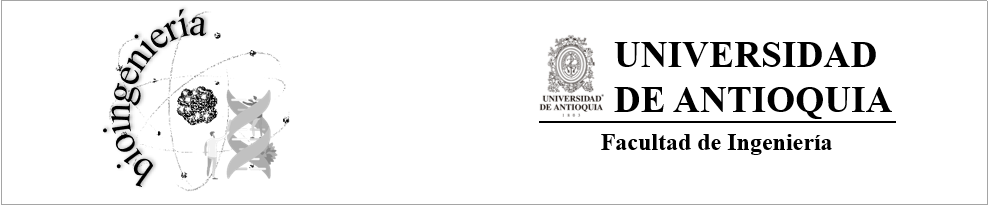

# **Regularización**

Cuando se usa $regularización$, se busca bajar la complejidad del modelo a la vez que se minimiza el error. Como hemos visto antes, la idea es que esto haga que los modelos sean más simples, los cuales tienden a generalizar mejor el problema. Recordemos que los modelos que son muy complejos tienden a sobreajustar.

## **1. Regularización en Modelos Lineales**

El objetivo en estos algoritmos es **penalizar coeficientes grandes** para mejorar la generalización.

# Regularización Lasso $L1$, Ridge $L2$ y $ElasticNet$

En muchas técnicas de Machine Learning, el aprendizaje consiste en encontrar los coeficientes que minimizan una función de costo, cómo los vimos en el notebook anterior. Pero, $la\ regularización$ consiste en añadir una penalización a esa función de costo.

# Regularización $Lasso\ L1$

En términos prácticos diremos que: la complejidad $C$ del modelo se mide como la media del valor absoluto de los coeficientes $w$ del modelo. Este concepto se puede aplicar a _regresiones lineales_, _polinómicas_ y _logística_, _Redes Neuronales_, _Máquinas de Soporte Vectorial_, etc. Y en términos matemáticos se vería de la sigueinte forma:


## $C = \frac{1}{N}\displaystyle\sum_{j=1}^{N}|w_j|$

Si los sumamos al MSE, la fórmula matemática nos quedaría:

## $J = \frac{1}{M}\displaystyle\sum_{i=1}^{M}(y_i\ - \ f(x_i))^2 + \lambda \cdot \frac{1}{N}\displaystyle\sum_{j=1}^{N}|w_j|$

## ¿Cuándo es efectiva $Lasso\ (L1)$?
$Lasso$ es de ayuda cuando hay sospecha de que varios de los atributos de entrada (_features_) sean irrelevantes, es decir, aportan poco o nada a la solución del problema. Al usar $Lasso$, se está favoreciendo que la solución sea poco densa. Es decir, que algunos de los coeficientes terminen valiendo 0. Esto puede ser muy útil para determinar cuáles de los atributos de entrada son los más relevantes y que influyan en obtención de modelos que generalice mejor. $Lasso$ es muy útil en este sentido, hace la selección de atributos de entrada. $Lasso$ funciona mejor cuando los atributos no están muy correlados entre ellos.

# Regularización  $Ridge\ (L2)$

Para este caso la regularización $Ridge$, la complejidad $C$ se mide como la media del cuadrado de los coeficientes del modelo. Al igual que ocurría en $Lasso$, $Ridge$ se puede aplicar a varias técnicas de ML.

## $C = \frac{1}{2\cdot N}\cdot\displaystyle\sum_{j=1}^{N}w_j^2$

## $J = \frac{1}{M}\displaystyle\sum_{i=1}^{M}(y_i\ - \ f(x_i))^2 + \lambda \cdot \displaystyle \frac{1}{2 \cdot N} \cdot \displaystyle\sum_{j=1}^{N}w_j^2$

## ¿Cuándo es efectiva Ridge (L2)?

Esta regularización $Ridge$ es útil cuando existen sospechas de que varios de los atributos de entrada (features) estén correlados entre ellos. $Ridge$ hace que los coeficientes acaben siendo más pequeños. Esta disminución de los coeficientes minimiza el efecto de la correlación entre los atributos de entrada y hace que el modelo generalice mejor. $Ridge$ funciona mejor cuando la mayoría de los atributos son relevantes.

# Regularización $ElasticNet\ (L1\ y\ L2)$

La regularización $ElasticNet$, es la combinación de $L1$ y $L2$. Se agrega un parámetro $r$ el cual indica la importancia relativa que pueden tienen $Lasso$ y $Ridge$ respectivamente.

## $C = r \cdot Lasso + (1-r) \cdot Ridge$

## $J = \frac{1}{M}\displaystyle\sum_{i=1}^{M}(y_i\ - \ f(x_i))^2 + r \cdot \lambda \frac{1}{N}\displaystyle\sum_{j=1}^{N}|w_j| + (1-r) \cdot \lambda \frac{1}{2N}\displaystyle\sum_{j=1}^{N}w_j^2$

### Si $r = 1$, entonces:

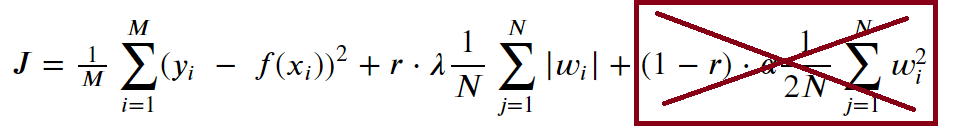

### Vuelve a ser Regularización $Lasso - L1$X

### Si $r = 0$, entonces:

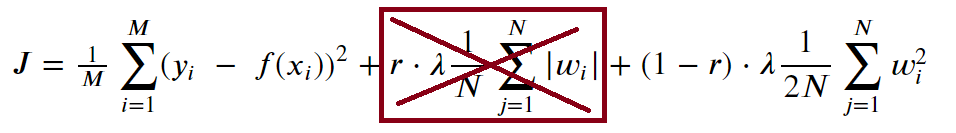

### Vuelve a ser Regularización $Ridge - L2$

## **Ejercicio**
Uso de la base de datos de los indios PIMA

#### 1. Carga de las librerías y la base de datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Cargar datos (usaremos el dataset de diabetes de sklearn como proxy)
# Nota: El dataset original PIMA está en https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
from sklearn.datasets import load_diabetes
data = load_diabetes()
X, y = data.data, data.target

# Binarizar la variable objetivo para clasificación (0 = no diabetes, 1 = diabetes)
y = np.where(y > np.median(y), 1, 0)  # Simplificación para el ejemplo

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2. Entrenamiento de diferentes modelos de RL variando entre los diferentes algoritmos de penalización

In [12]:
# Configurar modelos
models = {
    "L1 (Lasso)": LogisticRegression(penalty='l1', solver='liblinear', C=1, random_state=42),
    "L2 (Ridge)": LogisticRegression(penalty='l2', C=1, random_state=42),
    "ElasticNet": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1, random_state=42)
}

# Entrenar y evaluar
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        "accuracy": accuracy,
        "coefs": model.coef_[0]
    }
    print(f"{name} - Accuracy: {accuracy:.2f}")

L1 (Lasso) - Accuracy: 0.79
L2 (Ridge) - Accuracy: 0.80
ElasticNet - Accuracy: 0.83


#### 3. Comparativo de los coeficientes de cada modelo

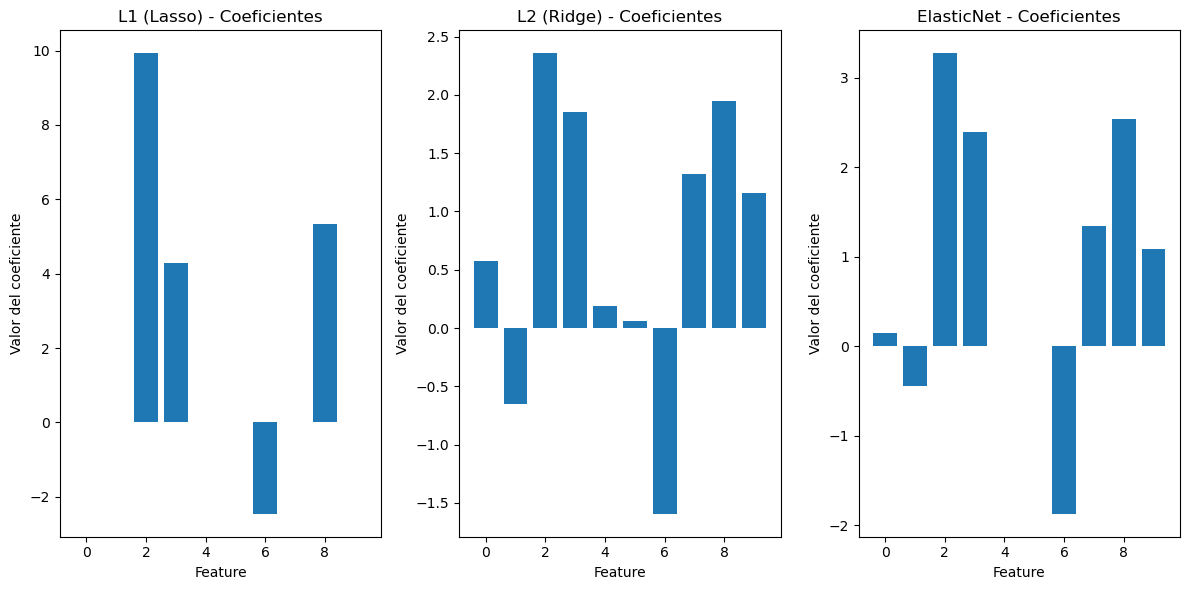

In [13]:
# Gráfico de coeficientes
plt.figure(figsize=(12, 6))
for i, (name, result) in enumerate(results.items()):
    plt.subplot(1, 3, i+1)
    plt.bar(range(len(result["coefs"])), result["coefs"])
    plt.title(f"{name} - Coeficientes")
    plt.xlabel("Feature")
    plt.ylabel("Valor del coeficiente")
plt.tight_layout()
plt.show()

#### 4. Comparación de las matrices de confusión de los modelos.

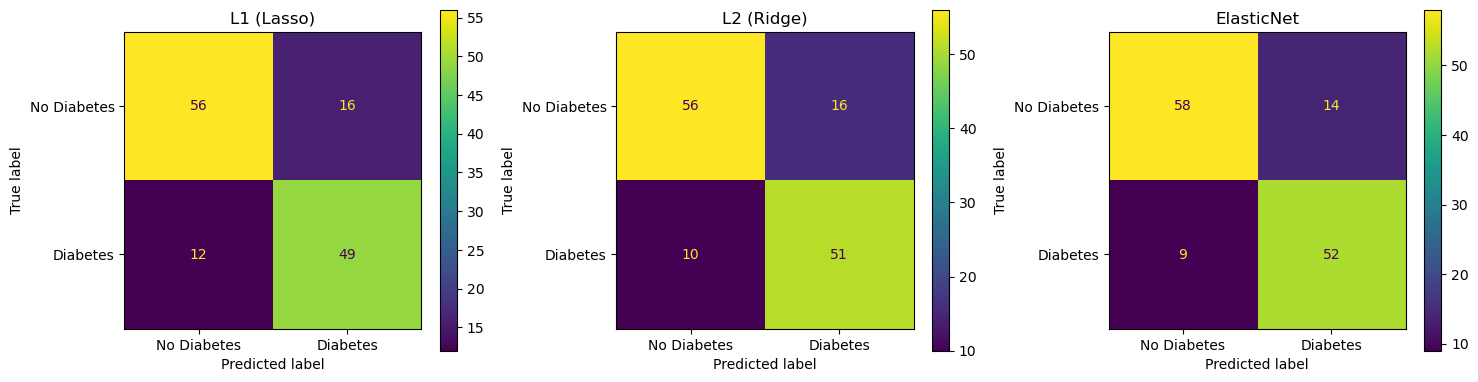

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["No Diabetes", "Diabetes"]).plot(ax=ax)
    ax.set_title(name)
plt.tight_layout()
plt.show()

### Usemos el mismo problema, pero hacemos una búsqueda en malla con los valores $C$ de regularización

In [15]:
from sklearn.model_selection import GridSearchCV

# Configurar los modelos y sus parámetros a optimizar
models_params = {
    "L1 (Lasso)": {
        "model": LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
        "params": {"C": [0.001, 0.01, 0.1, 1, 10]}  # C inverso a la fuerza de regularización
    },
    "L2 (Ridge)": {
        "model": LogisticRegression(penalty='l2', random_state=42),
        "params": {"C": [0.001, 0.01, 0.1, 1, 10]}
    },
    "ElasticNet": {
        "model": LogisticRegression(penalty='elasticnet', solver='saga', random_state=42),
        "params": {"C": [0.001, 0.01, 0.1, 1, 10], "l1_ratio": [0.1, 0.5, 0.9]}
    }
}

In [16]:
results = {}
for name, mp in models_params.items():
    clf = GridSearchCV(mp["model"], mp["params"], cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    results[name] = {
        "best_params": clf.best_params_,
        "best_score": clf.best_score_,
        "best_model": clf.best_estimator_
    }
    print(f"{name}: Mejores parámetros = {clf.best_params_}, Accuracy (CV) = {clf.best_score_:.3f}")

L1 (Lasso): Mejores parámetros = {'C': 10}, Accuracy (CV) = 0.715
L2 (Ridge): Mejores parámetros = {'C': 10}, Accuracy (CV) = 0.725
ElasticNet: Mejores parámetros = {'C': 10, 'l1_ratio': 0.1}, Accuracy (CV) = 0.725


/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [17]:
for name, res in results.items():
    y_pred = res["best_model"].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy en Test: {accuracy:.3f}")

L1 (Lasso) - Accuracy en Test: 0.782
L2 (Ridge) - Accuracy en Test: 0.812
ElasticNet - Accuracy en Test: 0.805


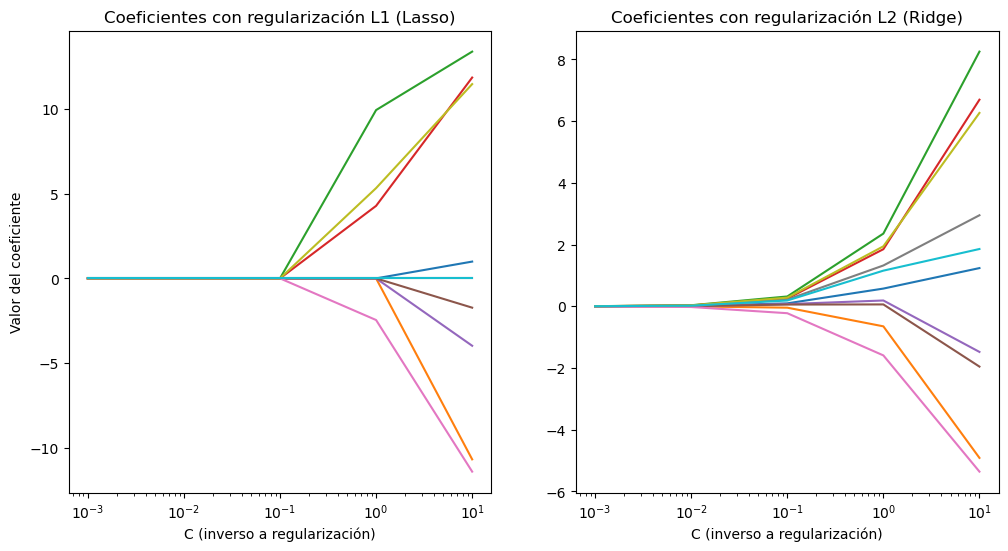

In [18]:
# Probamos distintos valores de C para L1 y L2
C_values = [0.001, 0.01, 0.1, 1, 10]
coefs_l1 = []
coefs_l2 = []

for C in C_values:
    l1 = LogisticRegression(penalty='l1', C=C, solver='liblinear').fit(X_train, y_train)
    l2 = LogisticRegression(penalty='l2', C=C).fit(X_train, y_train)
    coefs_l1.append(l1.coef_[0])
    coefs_l2.append(l2.coef_[0])

# Gráfico de evolución de coeficientes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(C_values, coefs_l1)
plt.xscale('log')
plt.title("Coeficientes con regularización L1 (Lasso)")
plt.xlabel("C (inverso a regularización)")
plt.ylabel("Valor del coeficiente")

plt.subplot(1, 2, 2)
plt.plot(C_values, coefs_l2)
plt.xscale('log')
plt.title("Coeficientes con regularización L2 (Ridge)")
plt.xlabel("C (inverso a regularización)")
plt.show()

# Regulariazción en Árboles de Decisión y algoritmos de agregados

Estos algoritmos usan la poda (*pruning*) para limitar la profundidad del árbol.

Ejemplo 3: Poda con $max\_depth$ y $min\_samples\_leaf$

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Árbol sin regularización (overfitting)
tree_no_reg = DecisionTreeRegressor(random_state=42)
tree_no_reg.fit(X_train, y_train)

# Árbol con regularización
tree_reg = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, random_state=42)
tree_reg.fit(X_train, y_train)

# Comparación de MSE
print("Sin regularización:", mean_squared_error(y_test, tree_no_reg.predict(X_test)))
print("Con regularización:", mean_squared_error(y_test, tree_reg.predict(X_test)))

Sin regularización: 0.2857142857142857
Con regularización: 0.16864566438098397
